In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./diabetes.csv')
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    print('## Confusion Matrix ##')
    print(confusion)
    print('\naccuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, auc: {4:.4f}'.format(accuracy, precision, recall, f1, auc))


from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for th in thresholds:
        binarizer = Binarizer(threshold=th).fit(pred_proba_c1)
        pre = binarizer.transform(pred_proba_c1)
        print('threshold: ', th)
        get_clf_eval(y_test, pre)
        
        
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    th_b = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:th_b], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:th_b], label='recall')
    
    # X axis scale -> 0.1 step
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# with No preprocessing

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
get_clf_eval(y_test, pred)

## Confusion Matrix ##
[[87 13]
 [22 32]]

accuracy: 0.7727, precision: 0.7111, recall: 0.5926, f1: 0.6465, auc: 0.7313


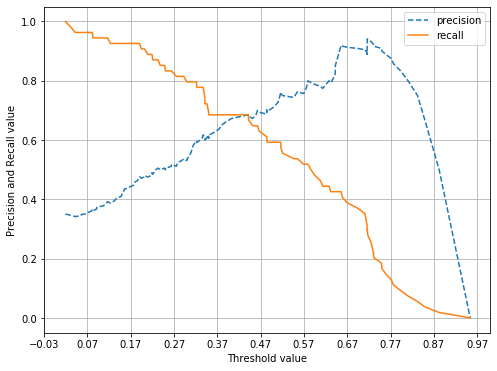

In [7]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# min이 0인 값들 분석
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} number of 0: {1}, in percent: {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose number of 0: 5, in percent: 0.65%
BloodPressure number of 0: 35, in percent: 4.56%
SkinThickness number of 0: 227, in percent: 29.56%
Insulin number of 0: 374, in percent: 48.70%
BMI number of 0: 11, in percent: 1.43%


In [11]:
# 0 값을 각 영역의 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [13]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# Scaling 적용
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

## Confusion Matrix ##
[[90 10]
 [21 33]]

accuracy: 0.7987, precision: 0.7674, recall: 0.6111, f1: 0.6804, auc: 0.7556


C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
# 여전히 recall 수치 개선 필요
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

threshold:  0.3
## Confusion Matrix ##
[[65 35]
 [11 43]]

accuracy: 0.7013, precision: 0.5513, recall: 0.7963, f1: 0.6515, auc: 0.7231
threshold:  0.33
## Confusion Matrix ##
[[71 29]
 [11 43]]

accuracy: 0.7403, precision: 0.5972, recall: 0.7963, f1: 0.6825, auc: 0.7531
threshold:  0.36
## Confusion Matrix ##
[[76 24]
 [15 39]]

accuracy: 0.7468, precision: 0.6190, recall: 0.7222, f1: 0.6667, auc: 0.7411
threshold:  0.39
## Confusion Matrix ##
[[78 22]
 [16 38]]

accuracy: 0.7532, precision: 0.6333, recall: 0.7037, f1: 0.6667, auc: 0.7419
threshold:  0.42
## Confusion Matrix ##
[[84 16]
 [18 36]]

accuracy: 0.7792, precision: 0.6923, recall: 0.6667, f1: 0.6792, auc: 0.7533
threshold:  0.45
## Confusion Matrix ##
[[85 15]
 [18 36]]

accuracy: 0.7857, precision: 0.7059, recall: 0.6667, f1: 0.6857, auc: 0.7583
threshold:  0.48
## Confusion Matrix ##
[[88 12]
 [19 35]]

accuracy: 0.7987, precision: 0.7447, recall: 0.6481, f1: 0.6931, auc: 0.7641
threshold:  0.5
## Confusion Matrix ##
[[9

In [16]:
# th = 0.48 선택
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048)

## Confusion Matrix ##
[[88 12]
 [19 35]]

accuracy: 0.7987, precision: 0.7447, recall: 0.6481, f1: 0.6931, auc: 0.7641
